In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

In [2]:
data = pd.read_csv("cleandata.csv")


In [3]:
df6 = data[(data['WeekID'] >='4/4/2019') & (data['WeekID'] <='4/5/2019')]
# df6.drop_duplicates()


In [4]:
df6.to_csv('data55.csv')

In [5]:
df7=df6.drop(['Performer','Unnamed: 0','Unnamed: 0.1','WeekID','url','Song','SongID','Instance','Week Position','Previous Week Position','spotify_track_popularity','spotify_track_album','artist_genre','Peak Position','spotify_genre','spotify_track_id','spotify_track_preview_url','spotify_track_duration_ms','spotify_track_explicit'],axis=1)

In [6]:
cor = df7.corr()

In [7]:
df7.head()

,Weeks on Chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
14,21,0.600,0.663,3.0,-5.802,1.0,0.0477,0.225,0.000000,0.1190,0.2860,121.070,4.0
70,2,0.344,0.325,11.0,-10.005,0.0,0.0287,0.348,0.023900,0.0686,0.0773,118.556,4.0
251,38,0.721,0.558,9.0,-8.800,1.0,0.0246,0.492,0.005630,0.1130,0.5420,96.887,4.0
688,20,0.407,0.147,2.0,-8.822,1.0,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3.0
741,7,0.297,0.148,11.0,-13.898,1.0,0.0337,0.897,0.000004,0.0990,0.0820,104.458,5.0


In [8]:
ss = StandardScaler()
X = ss.fit_transform(df7)

In [9]:
model = KMeans(2, verbose=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
print(model.cluster_centers_.shape)
model.cluster_centers_

(2, 13)


array([[ 0.02552546,  0.27175587,  0.60171967, -0.03647443,  0.44225672,
        -0.1064939 ,  0.20477307, -0.48465186,  0.0254751 ,  0.09674657,
         0.33001137,  0.00610449,  0.08010705],
       [-0.04110349, -0.43760689, -0.96894564,  0.05873456, -0.71216339,
         0.1714865 , -0.32974487,  0.78043204, -0.0410224 , -0.15579043,
        -0.53141537, -0.00983002, -0.12899591]])

In [11]:
print(model.labels_.shape)
model.labels_

(355,)


array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [12]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,0
1,1
2,1
3,1
4,1
...,...
350,0
351,0
352,0
353,0


In [13]:
model.labels_

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [14]:
df7.insert((df7.shape[1]), 'kmeans', kmeans_labels)

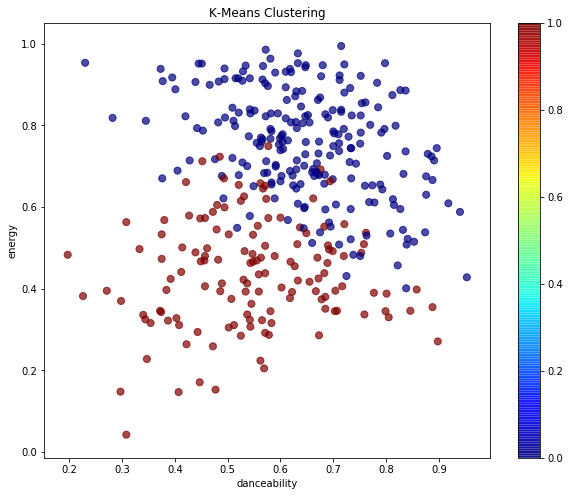

In [15]:
v1 = df7['danceability']
v2 = df7['energy']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
ax.set_title('K-Means Clustering')
ax.set_xlabel(v1.name)
ax.set_ylabel(v2.name)
plt.colorbar(scatter)
plt.show()

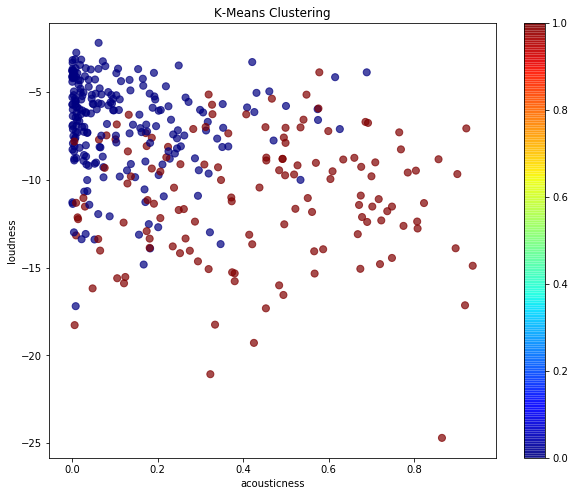

In [16]:
v1 = df7['acousticness']
v2 = df7['loudness']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
ax.set_title('K-Means Clustering')
ax.set_xlabel(v1.name)
ax.set_ylabel(v2.name)
plt.colorbar(scatter)
plt.show()

In [17]:
df7.head(3)

,Weeks on Chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,kmeans
14,21,0.600,0.663,3.0,-5.802,1.0,0.0477,0.225,0.00000,0.1190,0.2860,121.070,4.0,1.0
70,2,0.344,0.325,11.0,-10.005,0.0,0.0287,0.348,0.02390,0.0686,0.0773,118.556,4.0,1.0
251,38,0.721,0.558,9.0,-8.800,1.0,0.0246,0.492,0.00563,0.1130,0.5420,96.887,4.0,0.0
